# 贷款是否违约的预测

In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split #数据集切分

import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
data = pd.read_csv("H:/data-analysis-item/Data_Mining_Practice-8/data.csv")
    #H:/data-analysis-item/Data_Mining_Practice-8/data.csv    E:/mypython/Data-Mining-Pratice-8/data.csv
data.shape

(4754, 90)

In [3]:
data.head(10)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [4]:
data = data.drop(['Unnamed: 0','custid'], axis=1)  #删除无意义的index

## Task1 数据探索与分析

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 88 columns):
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
student_feature                               1756 non-null float64
repayment_cap

**目标变量的分布**

In [6]:
data.status.value_counts()

0    3561
1    1193
Name: status, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000292253C37F0>],
      dtype=object)

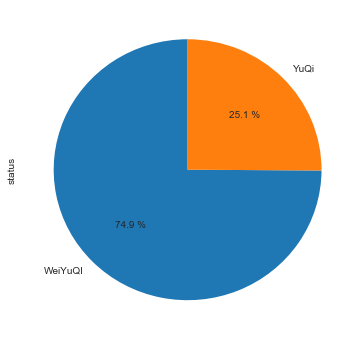

In [7]:
status_pie = pd.value_counts(data['status'])
status_pie.index = ["WeiYuQI","YuQi"]
labes = status_pie.index
status_pie.plot(kind='pie', subplots=True, figsize=(6, 6),autopct='%3.1f %%',startangle = 90)

**筛选出object属性的变量**

In [8]:
objectcol = data.select_dtypes(include='object')
objectcol.iloc[1]

trade_no                   20180507121002192000000023073000
bank_card_no                                            卡号1
reg_preference_for_trad                                一线城市
source                                                   xs
id_name                                                 崔向朝
latest_query_time                                2018-05-03
loans_latest_time                                2018-05-05
Name: 1, dtype: object

In [9]:
print(objectcol.bank_card_no.value_counts())  #对建模无意义，可删除
print(objectcol.reg_preference_for_trad.value_counts())
print(objectcol.source.value_counts())  #对建模无意义 ，可删除

卡号1    4754
Name: bank_card_no, dtype: int64
一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64
xs    4754
Name: source, dtype: int64


In [10]:
#无关变量的筛选
data = data.drop(['trade_no', 'bank_card_no', 'source', 'id_name','latest_query_time','loans_latest_time'], axis=1)
#latest_query_time最新查询时间   loans_latest_time最新贷款时间

数据类型转发：对object类型中的reg_preference_for_trad的数据替换

In [11]:
mapping_dict = {
    "reg_preference_for_trad":{
        "一线城市":1,
        "二线城市":2,
        "三线城市":3,
        "境外":4,
        "其他城市":5      
    }
}

data = data.replace(mapping_dict)#变量映射
data['reg_preference_for_trad'].head()  #查看效果

0    1.0
1    1.0
2    1.0
3    3.0
4    1.0
Name: reg_preference_for_trad, dtype: float64

**缺失值处理**

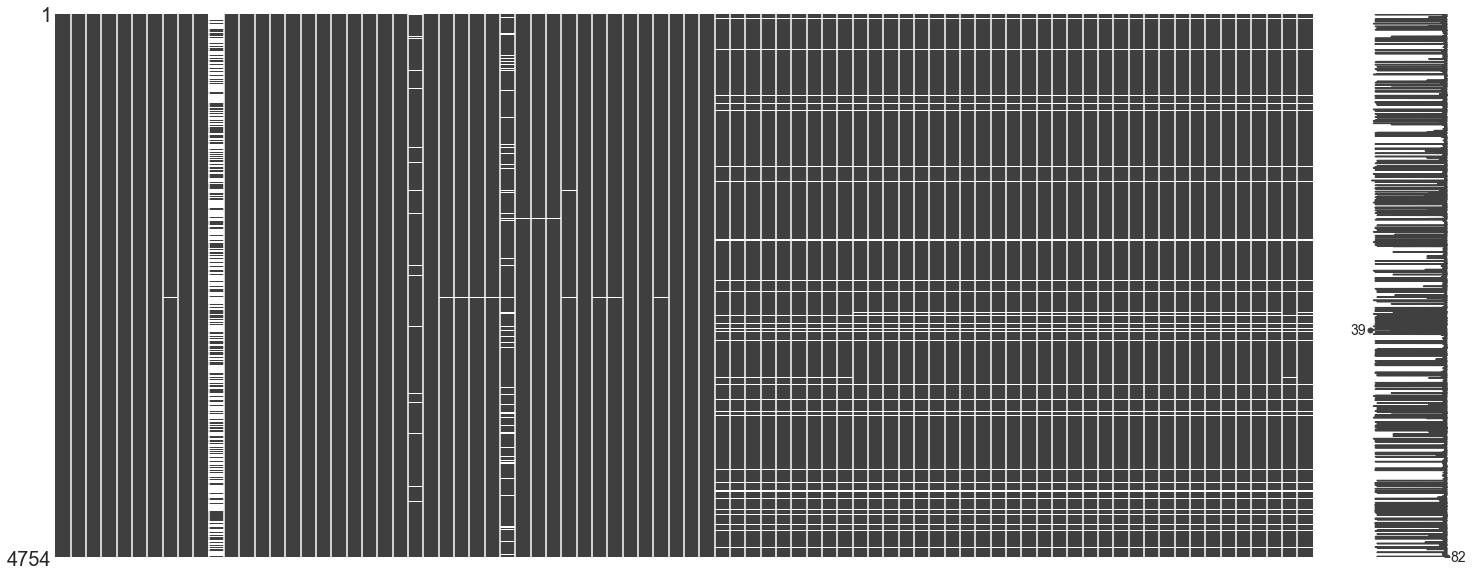

In [12]:
#数据整体情况
msno.matrix(data)

In [13]:
#计算各特征的缺失个数
data.isnull().sum().sort_values(ascending=False).head(15)

student_feature                     2998
cross_consume_count_last_1_month     426
latest_one_month_apply               304
query_finance_count                  304
latest_six_month_apply               304
latest_three_month_apply             304
query_cash_count                     304
query_sum_count                      304
query_org_count                      304
apply_credibility                    304
apply_score                          304
latest_query_day                     304
latest_one_month_loan                297
loans_score                          297
loans_credibility_behavior           297
dtype: int64

In [14]:
#用0填充student_feature的缺失值，假设缺失值不为学生
data['student_feature'][data['student_feature'].isnull()]=0
data.student_feature.head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: student_feature, dtype: float64

In [15]:
#多数的特征缺失值个数为297个，找出index
na_index = data['latest_one_month_loan'][data['latest_one_month_loan'].isnull()].index

In [16]:
#删除这部分数据的观测
data = data.drop(index=na_index, axis=0)

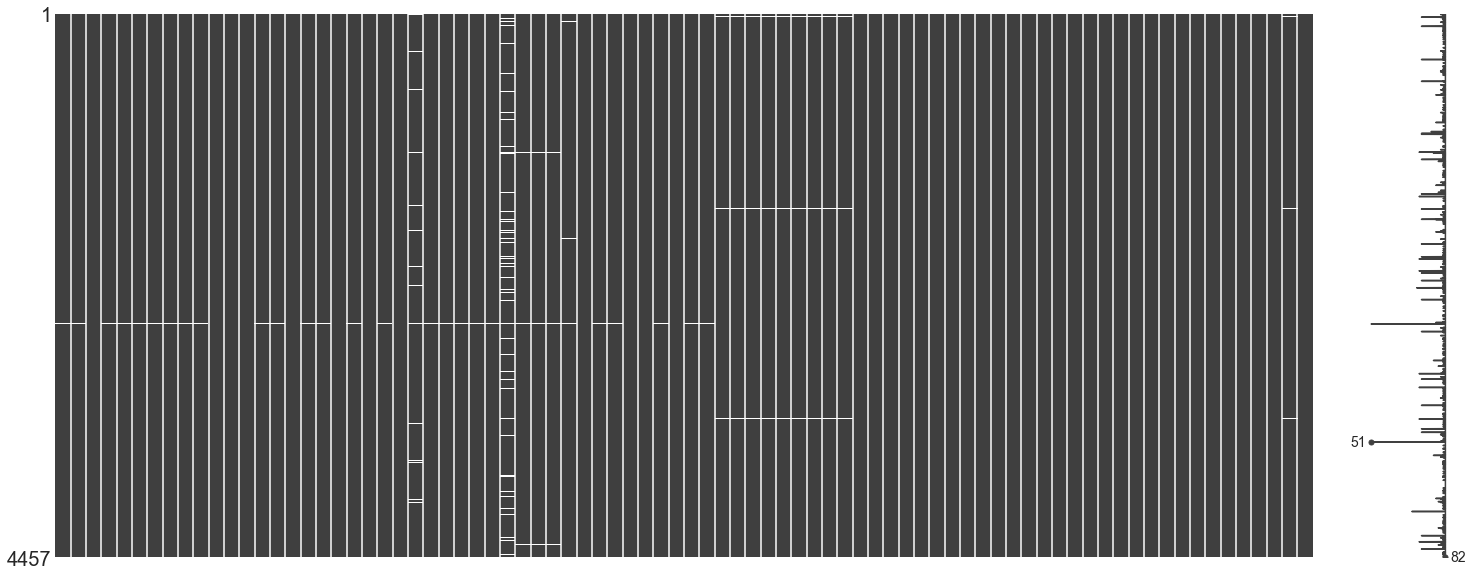

In [17]:
msno.matrix(data)

In [20]:
#筛选出还有缺失值的变量，用均值填充
na_col = data.isnull().sum().sort_values(
    ascending=False)[data.isnull().sum().sort_values(
        ascending=False) > 0].index

for i in na_col:
    data[i] = data[i].fillna(data[i].mean())

**根据特征中的同值比例筛选**

In [28]:
equi_fea = []
for i in data.columns:
    try:
        mode_value = data[i].mode()[0]
        mode_rate = (data[i].value_counts()[0]) / data.shape[0]
        if mode_rate > 0.9:
            equi_fea.append([i, mode_value, mode_rate])
    except:
        pass
#众数占整体的比例，筛选出大于90%的变量

In [29]:
e=pd.DataFrame(equi_fea,columns=['col_name','mode_value','mode_rate'])
e.sort_values(by='mode_rate')

,col_name,mode_value,mode_rate
1,railway_consume_count_last_12_month,0.0,0.977563
2,jewelry_consume_count_last_6_month,0.0,0.988557
0,is_high_user,0.0,0.988782


In [31]:
#该部分变量对建模无意义，删除
data = data.drop(e.col_name,axis=1)
data.shape

(4457, 79)

**切分数据集**

In [34]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=2018)
train_data.to_csv('./train.csv', index=False, header=True)
test_data.to_csv('./test.csv', index=False, header=True)